In [33]:
# Open Modules
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa

In [34]:
# Module made by myself
import training as tr

In [81]:
# Load Model
model = joblib.load("11112018_randomforest_oob.pkl")

In [82]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [83]:
# Load Data
f_format = "/*.wav"
directory = ""
#test_path = "/Users/junhyuckwoo/capstone/TestFile/Data/DistanceTest/mavic/*.wav"
test_path = "/Users/junhyuckwoo/capstone/TestFile/testing" + directory + f_format
test_files = glob.glob(test_path)
files_num = len(test_files)
print("# Test filest: ", files_num)

# Test filest:  12


In [84]:
# Input daata Preprocessing
raw, sr = librosa.load(test_files[11], sr=44100)
norm = maxabs_scale(raw)
data= librosa.feature.mfcc(norm, sr=44100, n_mfcc=13).T
# Checking for debugging
print("Data Shape", data.shape)

Data Shape (888, 13)


In [85]:
 label = np.ones(len(data))*0

In [86]:
test = data
y = label

In [87]:
result = tr.cross_val(model, test, y, 0.2, 10)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Input Data:  (888, 13)
Label Data:  (888,)
Ratio:  0.2
Iteration:  10 

0 is finished, Accuracy:  1.0
1 is finished, Accuracy:  1.0
2 is finished, Accuracy:  1.0
3 is finished, Accuracy:  1.0
4 is finished, Accuracy:  1.0
5 is finished, Accuracy:  1.0
6 is finished, Accuracy:  1.0
7 is finished, Accuracy:  1.0
8 is finished, Accuracy:  1.0
9 is finished, Accuracy:  1.0

F-Score: 1.0
Accuracy:  1.0
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       178

avg / total       1.00      1.00      1.00       178



In [88]:
prediction = model.predict(test)

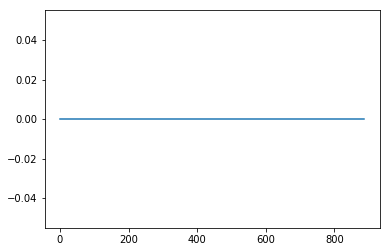

In [89]:
plt.plot(prediction[:44100])